In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import gym

In [2]:
def get_dataframes(algorithm):
    assert algorithm in ['PPO', 'RND', 'ICM', 'ES', 'PPO_SimHash']
    log_dir = os.getcwd() + '/logs/' + algorithm
    ppo_df = pd.DataFrame()
    for file in os.listdir(log_dir):
        for index, df_file in enumerate(os.listdir(log_dir + '/' + file)):
            df = pd.read_csv(log_dir + '/' + file + '/' + df_file)
            df['t'] = df.index
            env_name = [str(file) for _ in range(len(df))]
            run = [index + 1 for _ in range(len(df))]
            df["env"] = env_name
            df["run"] = run
            try:
                df["reward"] = df["ep_rew_mean"]
                df.drop(columns = ["ep_rew_mean"])
            except KeyError:
                pass
            ppo_df = pd.concat([ppo_df, df])

    ppo_df['total_time'] = np.floor(ppo_df.total_time)
    return ppo_df
def average_out(df, env):
    return df[df["env"] == env].groupby("t").mean()

def average_all(env):
    mean_ppo = average_out(ppo_df, env)
    mean_icm = average_out(icm_df, env)
    mean_rnd = average_out(rnd_df, env)
    mean_sh = average_out(simhash_df, env)
    mean_es = average_out(es_df, env)
    return mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es


In [3]:
ppo_df = get_dataframes("PPO")
icm_df = get_dataframes("ICM")
rnd_df = get_dataframes("RND")
simhash_df = get_dataframes("PPO_SimHash")
es_df = get_dataframes("ES")

In [ ]:

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
fig, ax = plt.subplots(2,3, figsize = (12, 6))
fig.delaxes(ax[1,2])

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedPendulum-v2")

ax[0][0].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][0].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][0].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][0].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][0].set_title('InvertedPendulum-v2')
ax[0][0].set_ylim(-30, 1050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedDoublePendulum-v2")

ax[0][1].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][1].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][1].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][1].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][1].set_title('InvertedDoublePendulum-v2')
ax[0][1].set_ylim(-300, 9050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Reacher-v2")

ax[0][2].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][2].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][2].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][2].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][2].set_title('Reacher-v2')
ax[0][2].set_ylim(-145, 5)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Swimmer-v2")

ax[1][0].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][0].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][0].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][0].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][0].set_title('Swimmer-v2')
ax[1][0].set_ylim(-10, 210)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

ax[1][1].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][1].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][1].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][1].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][1].set_title('Hopper-v2')
ax[1][1].set_ylim(-50, 2000)

plt.xlabel("Total Time")

plt.setp(ax, xticks=[0, 1e+6], xlim=[-0.5e+5, 1.05e+6])
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0., fontsize = "large")
plt.savefig("timestep_comparison.eps", format='eps')

In [ ]:
def get_earliest(df, column, target, value):
    return df[df[column] > value].iloc[0][target]

In [357]:
environments = ["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Reacher-v2", "Swimmer-v2", "Hopper-v2"]
average = 0
for i, env in enumerate(environments):
    mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all(env)
    average += get_earliest(mean_rnd, "total timesteps", "total_time", 1e+6)
    
average/len(environments)

1636.8520202020202

In [358]:
run_times = pd.DataFrame()
columns = ["PPO", "PPO_SimHash", "PPO_ICM", "PPO_RND", "ES"]
def extract_times(df, env):
    assert env in ["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Reacher-v2", "Swimmer-v2", "Hopper-v2"]
    arr = []
    for i in np.unique(df[(df["env"] == env)].run):
        try:
            arr.append(get_earliest(df[(df["env"] == env) & (df["run"] == i)], "reward", "total_time", 800))
        except:
            pass
    return arr

dataframes = [ppo_df, simhash_df, icm_df, rnd_df, es_df]
for column, df in zip(columns, dataframes):
    c = extract_times(df, "Hopper-v2")
    df1 = pd.DataFrame({column:c})
    run_times = pd.concat([run_times, df1], axis=1)

In [359]:
long_format = pd.melt(run_times).dropna()
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=long_format['value'], groups=long_format['variable'], alpha=0.05)
print(m_comp)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1    group2    meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
     ES         PPO   407.475 0.0766  -28.1734  843.1234  False
     ES     PPO_ICM   520.775 0.0122   85.1266  956.4234   True
     ES     PPO_RND  626.1607 0.0046  150.8294 1101.4921   True
     ES PPO_SimHash   211.075 0.6247 -224.5734  646.7234  False
    PPO     PPO_ICM     113.3    0.9 -297.4332  524.0332  False
    PPO     PPO_RND  218.6857 0.6268 -233.9203  671.2917  False
    PPO PPO_SimHash    -196.4 0.6347 -607.1332  214.3332  False
PPO_ICM     PPO_RND  105.3857    0.9 -347.2203  557.9917  False
PPO_ICM PPO_SimHash    -309.7 0.2184 -720.4332  101.0332  False
PPO_RND PPO_SimHash -415.0857  0.086 -867.6917   37.5203  False
---------------------------------------------------------------


In [351]:
run_times = run_times.dropna()
levene(run_times["PPO"], run_times["PPO_SimHash"], run_times["PPO_ICM"], run_times["PPO_RND"], run_times["ES"])

LeveneResult(statistic=1.6831315593102827, pvalue=0.17988891362008735)

In [360]:
def anova(run_times):
    return stats.kruskal(run_times["PPO"][np.isnan(run_times["PPO"]) == False], 
                           run_times["ES"][np.isnan(run_times["ES"]) == False],
                         run_times["PPO_SimHash"][np.isnan(run_times["PPO_SimHash"]) == False],
                         run_times["PPO_ICM"][np.isnan(run_times["PPO_ICM"]) == False],
                         run_times["PPO_RND"][np.isnan(run_times["PPO_RND"]) == False])
anova(run_times)

KruskalResult(statistic=19.51283304941977, pvalue=0.0006230311364456358)

In [ ]:
from scipy.stats import stats

In [354]:
def get_quickest():
    df = pd.DataFrame()
    index = ["PPO", "ICM", "RND", "SH", "ES"]
    envs = ["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Reacher-v2", "Swimmer-v2", "Hopper-v2"] 
    targets = [900, 7000, -20, 100, 1400]
    for i, env in enumerate(envs):
        mean_df = average_all(env)
        c = []
        for m_df in mean_df:          
            try:
                c.append(get_earliest(m_df, "reward", "total_time", targets[i]))
            except:
                c.append(np.inf)
                pass
        df1 = pd.DataFrame({envs[i]:c})
        df1.index = index   
        df = pd.concat([df, df1], axis = 1)
    return df

comparison_df = get_quickest()
comparison_rank = comparison_df.rank()
comparison_rank = comparison_rank.replace(np.nan, 5)
comparison_df

,InvertedPendulum-v2,InvertedDoublePendulum-v2,Reacher-v2,Swimmer-v2,Hopper-v2
PPO,105.000000,407.222222,59.500000,344.3,1053.8
ICM,283.625000,615.909091,77.200000,985.6,1153.2
RND,241.833333,1883.666667,138.636364,599.2,inf
SH,229.000000,388.300000,40.600000,735.1,947.7
ES,101.000000,inf,51.583333,109.5,inf


In [ ]:
comparison_rank["Overall"] = comparison_rank[list(comparison_rank.columns)].mean(axis=1)
comparison_rank

In [356]:
comparison_rank["InvertedPendulum-v2"] = [1, 3, 2, 2, 1]
comparison_rank["InvertedDoublePendulum-v2"] = [1, 1, 2, 1, 3]
comparison_rank["Reacher-v2"] = [2, 3, 4, 1, 1]
comparison_rank["Swimmer-v2"] = [2, 3,3,3, 1]
comparison_rank["Hopper-v2"] = [2, 3,3,3, 1]
comparison_rank.mean(axis=1)

PPO    1.6
ICM    2.6
RND    2.8
SH     2.0
ES     1.4
dtype: float64

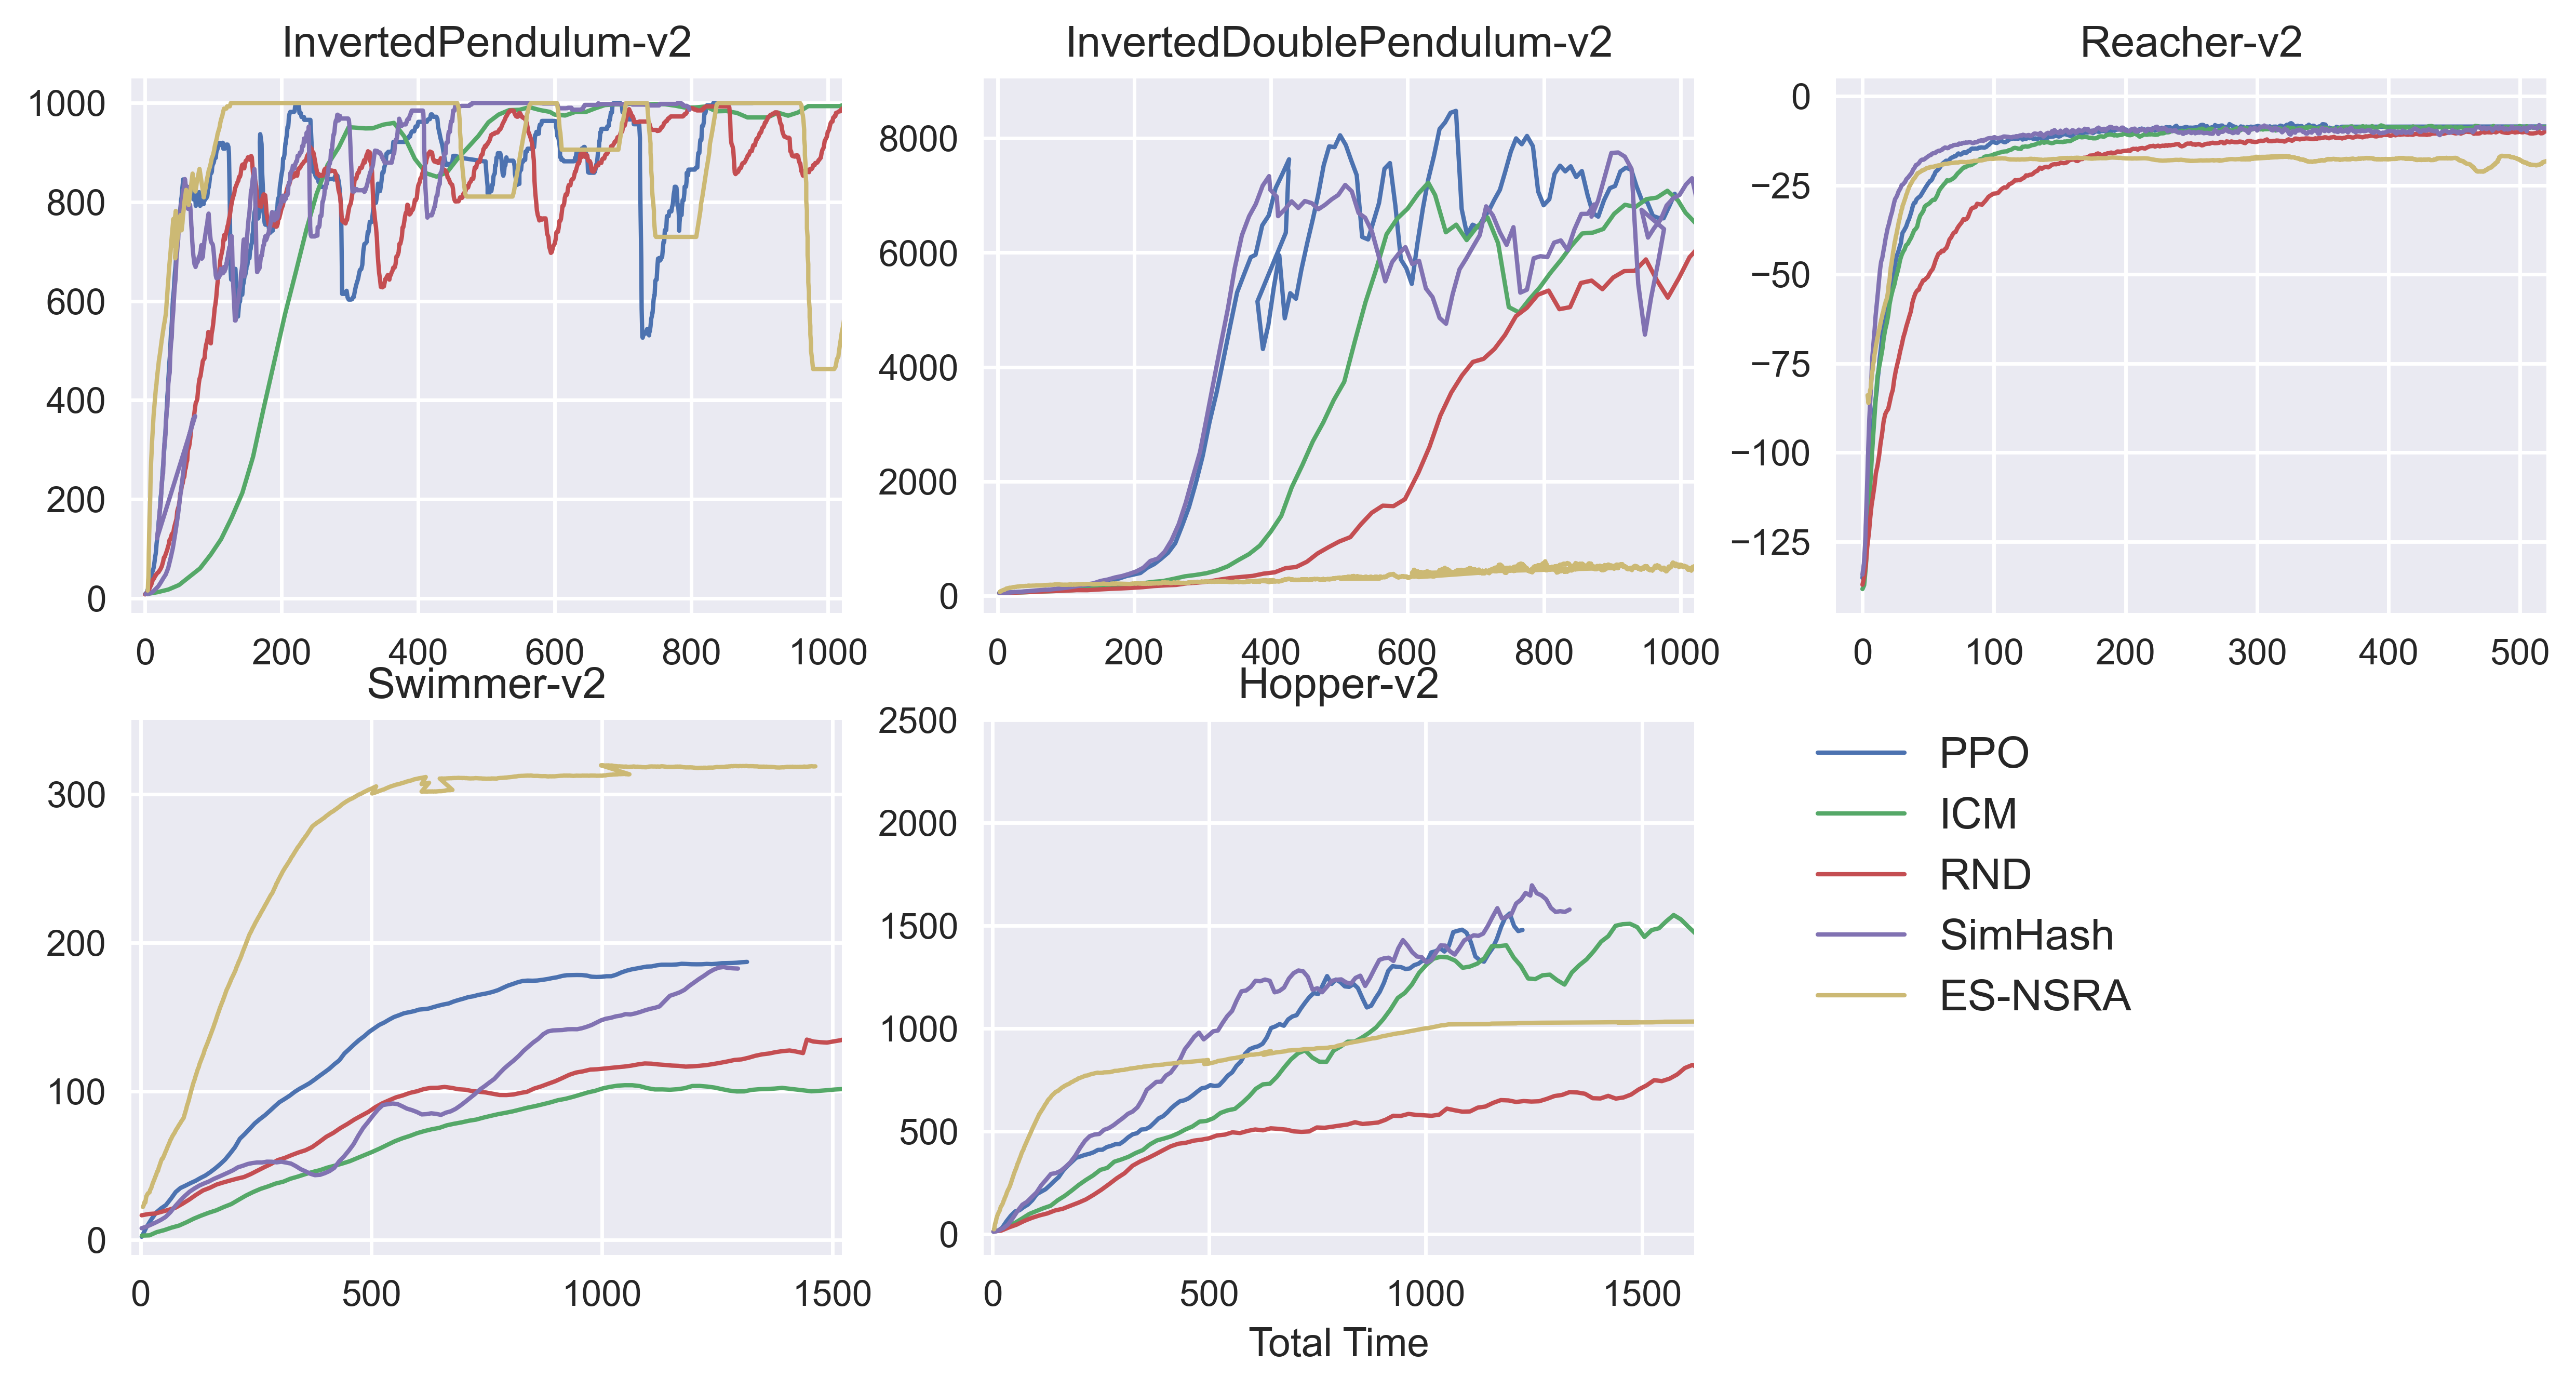

In [7]:

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
fig, ax = plt.subplots(2,3, figsize = (12,6))
fig.delaxes(ax[1,2])

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedPendulum-v2")

ax[0][0].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][0].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][0].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][0].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][0].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[0][0].set_title('InvertedPendulum-v2')
ax[0][0].set_xlim(-20, 1020)
ax[0][0].set_ylim(-30, 1050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedDoublePendulum-v2")

ax[0][1].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][1].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][1].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][1].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][1].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[0][1].set_title('InvertedDoublePendulum-v2')
ax[0][1].set_xlim(-20, 1020)
ax[0][1].set_ylim(-300, 9050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Reacher-v2")

ax[0][2].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][2].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][2].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][2].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][2].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[0][2].set_title('Reacher-v2')
ax[0][2].set_xlim(-20, 520)
ax[0][2].set_ylim(-145, 5)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Swimmer-v2")

ax[1][0].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][0].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][0].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][0].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][0].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[1][0].set_xlim(-20, 1520)
ax[1][0].set_ylim(-10, 350)
ax[1][0].set_title('Swimmer-v2')

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

ax[1][1].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][1].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][1].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][1].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][1].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[1][1].set_xlim(-20, 1620)
ax[1][1].set_ylim(-100, 2500)
ax[1][1].set_title('Hopper-v2')

plt.xlabel("Total Time")

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0., fontsize = "large")
plt.savefig(".\\images\\time_comparison")

In [ ]:
def keep_below_target(df, target):
    return df[: df[df["reward"] > target].index[0+1]]

In [ ]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedPendulum-v2")

mean_ppo = keep_below_target(mean_ppo, 900)
mean_icm = keep_below_target(mean_icm, 900)
mean_rnd = keep_below_target(mean_rnd, 900)
mean_sh = keep_below_target(mean_sh, 900)
mean_es = keep_below_target(mean_es, 900)

plt.rcParams['figure.dpi']= 1000
plt.style.use('seaborn')
plt.figure(figsize=(6, 5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.5)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.5)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.5)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.5)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.5)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.yticks([100, 200, 300, 400, 500, 600, 700, 800, 900])
plt.hlines(900, 0, 500, linestyles='dotted', linewidth=1.5)
plt.title("InvertedPendulum-v2")
plt.savefig("InvertedPendulum.eps", format='eps')

In [ ]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedDoublePendulum-v2")

mean_ppo = keep_below_target(mean_ppo, 7000)
mean_icm = keep_below_target(mean_icm, 7000)
mean_rnd = keep_below_target(mean_rnd, 7000)
mean_sh = keep_below_target(mean_sh, 7000)

plt.rcParams['figure.dpi']= 1000
plt.style.use('seaborn')
plt.figure(figsize=(6,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.5)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.5)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.5)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.5)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(7000, 0, 2000, linestyles='dotted', linewidth=1.5)
plt.title("InvertedDoublePendulum-v2")
plt.savefig("InvertedDoublePendulum.eps", format='eps')

In [ ]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Reacher-v2")

mean_ppo = keep_below_target(mean_ppo, -20)
mean_icm = keep_below_target(mean_icm, -20)
mean_rnd = keep_below_target(mean_rnd, -20)
mean_sh = keep_below_target(mean_sh, -20)
mean_es = keep_below_target(mean_es, -20)

plt.rcParams['figure.dpi']= 1000
plt.style.use('seaborn')
plt.figure(figsize=(6,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.5)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.5)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.5)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.5)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.5)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(-20, 0, 200, linestyles='dotted', linewidth=1.5)
plt.title("Reacher-v2")
plt.savefig("Reacher.eps", format='eps')

In [ ]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Swimmer-v2")

mean_ppo = keep_below_target(mean_ppo, 100)
mean_icm = keep_below_target(mean_icm, 100)
mean_rnd = keep_below_target(mean_rnd, 100)
mean_sh = keep_below_target(mean_sh, 100)
mean_es = keep_below_target(mean_es, 100)

plt.rcParams['figure.dpi']= 1000
plt.style.use('seaborn')
plt.figure(figsize=(6,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.5)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.5)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.5)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.5)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.5)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(100, 0, 1000, linestyles='dotted', linewidth=1.5)
plt.title("Swimmer-v2")
plt.savefig("Swimmer.eps", format='eps')

In [ ]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

mean_ppo = keep_below_target(mean_ppo, 800)
mean_icm = keep_below_target(mean_icm, 800)
mean_rnd = keep_below_target(mean_rnd, 800)
mean_sh = keep_below_target(mean_sh, 800)
mean_es = keep_below_target(mean_es, 800)

plt.rcParams['figure.dpi']= 1000
plt.style.use('seaborn')
plt.figure(figsize=(6,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.5)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.5)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.5)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.5)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.5)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(800, 0, 1600, linestyles='dotted', linewidth=1.5)
plt.title("Hopper-v2")
plt.savefig("Hopper.eps", format='eps')

In [ ]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

mean_ppo = keep_below_target(mean_ppo, 1400)
mean_icm = keep_below_target(mean_icm, 1400)
mean_sh = keep_below_target(mean_sh, 1400)

plt.rcParams['figure.dpi']= 1000
plt.style.use('seaborn')
plt.figure(figsize=(6,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.5)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.5)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.5, color = "#9467bd")
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(1400, 0, 1600, linestyles='dotted', linewidth=1.5)
plt.title("Hopper-v2")
plt.savefig("hopper-nornd.eps", format='eps')

In [ ]:
rnd_dpend = rnd_df[rnd_df["env"] == "InvertedDoublePendulum-v2"]

In [313]:
successfull = 0
for run in np.unique(rnd_dpend["run"]):
    try:
        keep_below_target(rnd_dpend[rnd_dpend["run"] == run], 8500)
        successfull += 1
    except:
        pass
    
print(successfull/ np.max(rnd_dpend["run"]))

0.2


In [307]:
np.max(rnd_dpend["run"])

10